# DataSet

### Importing Packages

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Turning CSVs into DataFrames

In [120]:
Activity_Data = pd.read_csv('NLA Customer Flight Activity.csv')
History_Data = pd.read_csv('NLA Customer Loyalty History.csv')

In [121]:
Activity_df = pd.DataFrame(Activity_Data)
History_df = pd.DataFrame(History_Data)

In [122]:
Activity_df

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2018,12,5,12060,12060.0,0,0
1,100018,2017,11,4,2028,2028.0,0,0
2,100018,2017,3,4,9648,9648.0,438,79
3,100018,2018,9,4,8932,8932.0,0,0
4,100018,2017,7,3,3687,3687.0,0,0
...,...,...,...,...,...,...,...,...
392859,999986,2018,4,0,0,0.0,0,0
392860,999986,2018,5,0,0,0.0,0,0
392861,999986,2018,6,0,0,0.0,0,0
392862,999986,2018,9,0,0,0.0,0,0


In [123]:
History_df

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


###### * Calendar table is unnecessary.
###### * Columns Start of Year/Quarter/Month and redundant and can be extracted from the Date.
###### * Time-related parameters in other tables are in month and year level only, so the Calendar could've been in YYYY-MM format (and 30 times smaller).

# Data Basic Information

### DataTypes

In [124]:
Activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392864 entries, 0 to 392863
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392864 non-null  int64  
 1   Year                         392864 non-null  int64  
 2   Month                        392864 non-null  int64  
 3   Total Flights                392864 non-null  int64  
 4   Distance                     392864 non-null  int64  
 5   Points Accumulated           392864 non-null  float64
 6   Points Redeemed              392864 non-null  int64  
 7   Dollar Cost Points Redeemed  392864 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [125]:
History_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.9+

###### Cancellation Year/Month shouldn't be float64 - change before analyzing
###### No reason for Points Accumulated to be float64 as well - change befor analyzing

In [126]:
Activity_df['Loyalty Number'].value_counts()

Loyalty Number
974875    48
114414    48
243741    48
407404    48
467894    48
          ..
110262    11
110142    11
112522    11
114131    11
943602    11
Name: count, Length: 16736, dtype: int64

### TimeFrames

In [127]:
History_df.sort_values(by=['Enrollment Year', 'Enrollment Month'], ascending = False).head(1)

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
330,120613,Quebec,Hull,J8Y 3Z5,Female,College,NaN,Single,Star,4466.1,Standard,2018,12,NaN,NaN


In [128]:
Activity_df.sort_values(by=['Year', 'Month']).head(1)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
14,100018,2017,1,1,601,601.0,0,0


###### Enrollments (Loyalty History) are documented from 4-2012 to 12-2018
###### Cancellations (Loyalty History) are documented from 1-2013 to 12-2018
###### Flight Activity (Flight Activity) are documented from 1-2017 to 12-2018

### Statistics

In [129]:
Activity_df.describe().round(2)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392864.00,392864.00,392864.00,392864.00,392864.00,392864.00,392864.00,392864.00
mean,550504.12,2017.51,6.51,1.30,1941.64,2027.38,31.31,5.64
std,258622.50,0.50,3.45,1.96,3240.13,3872.37,126.66,22.80
min,100018.00,2017.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,327653.00,2017.00,4.00,0.00,0.00,0.00,0.00,0.00
50%,551828.00,2018.00,7.00,0.00,0.00,0.00,0.00,0.00
75%,772237.00,2018.00,10.00,2.00,3020.00,3039.00,0.00,0.00
max,999986.00,2018.00,12.00,28.00,67284.00,100926.00,876.00,158.00


In [130]:
History_df.describe().round(2)

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.00,12499.00,16737.00,16737.00,16737.00,2067.00,2067.00
mean,549735.88,79245.61,7988.90,2015.25,6.67,2016.50,6.96
std,258912.13,35008.30,6860.98,1.98,3.40,1.38,3.46
min,100018.00,-58486.00,1898.01,2012.00,1.00,2013.00,1.00
25%,326603.00,59246.50,3980.84,2014.00,4.00,2016.00,4.00
50%,550434.00,73455.00,5780.18,2015.00,7.00,2017.00,7.00
75%,772019.00,88517.50,8940.58,2017.00,10.00,2018.00,10.00
max,999986.00,407228.00,83325.38,2018.00,12.00,2018.00,12.00


###### Null values only in Cancellation Year/Month (which makes sense)
###### Salaries cannot be negative values - should clean DF before analyzing

### Customers with Negative Salaries

In [131]:
neg_salary = pd.DataFrame(columns=['Loyalty Number', 'Salary'])

for i in range(len(History_df)):
    if History_df['Salary'][i] <= 0:
        neg_salary.loc[i] = [History_df['Loyalty Number'][i].astype(str), History_df['Salary'][i]]
    else:
        pass
neg_salary.sort_values(by='Loyalty Number')




,Loyalty Number,Salary
6560,115505,-10605.0
7373,152016,-58486.0
8576,194065,-31911.0
8767,212128,-49001.0
2471,232755,-46683.0
14327,239955,-47310.0
14355,347013,-39503.0
13564,364596,-26322.0
11635,366599,-9081.0
6570,430398,-17534.0


### Finding the Key

In [132]:
Unique_Val_Activity = len(Activity_df['Loyalty Number'].unique())
Total_Val_Activity = Activity_df['Loyalty Number'].count()

Unique_Val_History = len(History_df['Loyalty Number'].unique())
Total_Val_History = History_df['Loyalty Number'].count()

print(f'Unique Values Activity: {Unique_Val_Activity}, Total Values Activity: {Total_Val_Activity}')
print(f'Unique Values History: {Unique_Val_History}, Total Values History: {Total_Val_History}')

Unique Values Activity: 16736, Total Values Activity: 392864
Unique Values History: 16737, Total Values History: 16737


###### In History table each row represents a different customer, and each Loyalty Number is unique.
###### In Activity table each row represents a different order, and some Lolyalty Numbers are repeated.
###### Joining Key will be Loyalty Number in both tables.

# Data Cleaning

### Removing Duplicate Rows

In [133]:
Activity_df['Total Flights'] = pd.to_numeric(Activity_df['Total Flights'], errors='coerce')

Activity_df_sorted = Activity_df.sort_values(
    by=['Total Flights'], 
    ascending=False
)

Activity_df_Clean = Activity_df_sorted.drop_duplicates(
    subset=['Loyalty Number', 'Year', 'Month'],
    keep='first'
)


Activity_df_Clean

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
49696,214095,2018,7,28,56364,84546.0,752,135
155900,459164,2018,7,28,41160,61740.0,513,92
161179,471015,2018,7,28,56196,84294.0,0,0
4526,110065,2018,7,28,65184,97776.0,0,0
294852,772532,2018,7,28,36764,55146.0,777,140
...,...,...,...,...,...,...,...,...
392860,999986,2018,5,0,0,0.0,0,0
392861,999986,2018,6,0,0,0.0,0,0
392862,999986,2018,9,0,0,0.0,0,0
392863,999986,2018,12,0,0,0.0,0,0


### Changing Data Types

In [134]:
History_df['Cancellation Year'] = History_df['Cancellation Year'].astype('Int64')
History_df['Cancellation Month'] = History_df['Cancellation Month'].astype('Int64')
Activity_df_Clean['Points Accumulated'] = Activity_df_Clean['Points Accumulated'].round().astype('Int64')



C:\Users\User\AppData\Local\Temp\ipykernel_41744\2186139381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_df_Clean['Points Accumulated'] = Activity_df_Clean['Points Accumulated'].round().astype('Int64')


### Removing Negative Salaries

In [135]:
History_df['Salary'] = History_df['Salary'].clip(lower=0)

### Adding Date Columns

In [136]:
Activity_df_Clean['Date'] = pd.to_datetime(Activity_df_Clean['Year'].astype(str) + '-' + Activity_df_Clean['Month'].astype(str) + '-01')

History_df['Enrollment Date'] = pd.to_datetime(History_df['Enrollment Year'].astype(str) + '-' + History_df['Enrollment Month'].astype(str) + '-01')

History_df['Cancellation Date'] = pd.to_datetime(
    History_df['Cancellation Year'].astype(str) + '-' +
    History_df['Cancellation Month'].astype(str) + '-01',
    errors='coerce'
)

Activity_df_Clean

C:\Users\User\AppData\Local\Temp\ipykernel_41744\3620720318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Activity_df_Clean['Date'] = pd.to_datetime(Activity_df_Clean['Year'].astype(str) + '-' + Activity_df_Clean['Month'].astype(str) + '-01')
C:\Users\User\AppData\Local\Temp\ipykernel_41744\3620720318.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  History_df['Cancellation Date'] = pd.to_datetime(


,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
49696,214095,2018,7,28,56364,84546,752,135,2018-07-01
155900,459164,2018,7,28,41160,61740,513,92,2018-07-01
161179,471015,2018,7,28,56196,84294,0,0,2018-07-01
4526,110065,2018,7,28,65184,97776,0,0,2018-07-01
294852,772532,2018,7,28,36764,55146,777,140,2018-07-01
...,...,...,...,...,...,...,...,...,...
392860,999986,2018,5,0,0,0,0,0,2018-05-01
392861,999986,2018,6,0,0,0,0,0,2018-06-01
392862,999986,2018,9,0,0,0,0,0,2018-09-01
392863,999986,2018,12,0,0,0,0,0,2018-12-01


In [137]:
History_df_Clean = History_df

History_df_Clean.sort_values('Salary')

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date,Cancellation Date
16735,906428,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,0.0,Married,Star,10018.66,2018 Promotion,2018,4,<NA>,<NA>,2018-04-01,NaT
11635,366599,Ontario,Toronto,M1R 4K3,Female,Bachelor,0.0,Married,Star,6915.73,2018 Promotion,2018,4,<NA>,<NA>,2018-04-01,NaT
4712,491242,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,0.0,Married,Star,7597.91,2018 Promotion,2018,3,<NA>,<NA>,2018-03-01,NaT
13564,364596,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,0.0,Single,Aurora,16710.84,2018 Promotion,2018,4,2018,12,2018-04-01,2018-12-01
6570,430398,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,0.0,Married,Nova,49423.80,2018 Promotion,2018,3,<NA>,<NA>,2018-03-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16721,632951,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,<NA>,<NA>,2018-07-01,NaT
16727,546773,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,<NA>,<NA>,2015-09-01,NaT
16731,900501,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,<NA>,<NA>,2012-09-01,NaT
16732,823768,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,<NA>,<NA>,2012-12-01,NaT


### Dates Validaion

#### Enrollment Date vs. First Activity Date

In [138]:
activity_summary = Activity_df_Clean.groupby('Loyalty Number').agg(
    First_Activity=('Date', 'min'),
    Last_Activity=('Date', 'max'),
    Activity_Row_Count=('Date', 'count')
).reset_index()

history_summary = History_df_Clean[['Loyalty Number', 'Enrollment Date', 'Cancellation Date']]

Customer_Timeline = history_summary.merge(
    activity_summary,
    on='Loyalty Number',
    how='left'
)

Customer_Timeline

,Loyalty Number,Enrollment Date,Cancellation Date,First_Activity,Last_Activity,Activity_Row_Count
0,480934,2016-02-01,NaT,2017-01-01,2018-12-01,24.0
1,549612,2016-03-01,NaT,2017-01-01,2018-12-01,24.0
2,429460,2014-07-01,2018-01-01,2017-01-01,2018-12-01,24.0
3,608370,2013-02-01,NaT,2017-01-01,2018-12-01,24.0
4,530508,2014-10-01,NaT,2017-01-01,2018-12-01,24.0
...,...,...,...,...,...,...
16732,823768,2012-12-01,NaT,2017-01-01,2018-12-01,24.0
16733,680886,2014-09-01,NaT,2017-01-01,2018-12-01,24.0
16734,776187,2014-03-01,NaT,2017-01-01,2018-12-01,24.0
16735,906428,2018-04-01,NaT,2018-02-01,2018-12-01,11.0


In [139]:
Customer_Timeline['Enrollment Date']>Customer_Timeline['First_Activity']

0        False
1        False
2        False
3        False
4        False
         ...  
16732    False
16733    False
16734    False
16735     True
16736    False
Length: 16737, dtype: bool

In [140]:
Customers_First = Customer_Timeline[
    Customer_Timeline['First_Activity'] < Customer_Timeline['Enrollment Date']
]['Loyalty Number'].tolist()

pd.DataFrame(Customers_First)

,0
0,611765
1,172755
2,552965
3,557752
4,403361
...,...
5009,351296
5010,753864
5011,670666
5012,632951


In [141]:
Customer_Timeline[Customer_Timeline['Loyalty Number'] == 611765]

,Loyalty Number,Enrollment Date,Cancellation Date,First_Activity,Last_Activity,Activity_Row_Count
12,611765,2018-01-01,NaT,2017-01-01,2018-12-01,24.0


###### There are 5041 customers that the first activity is prior to the enrollment date 

#### Cancellation Date vs. Last Activity Date

In [142]:
Customers_Last = Customer_Timeline[
    Customer_Timeline['Last_Activity'] > Customer_Timeline['Cancellation Date']
]['Loyalty Number'].tolist()

pd.DataFrame(Customers_Last)

,0
0,429460
1,354730
2,201574
3,834891
4,733338
...,...
1990,640285
1991,969719
1992,795743
1993,672917


In [143]:
Customer_Timeline[Customer_Timeline['Loyalty Number'] == 429460]

,Loyalty Number,Enrollment Date,Cancellation Date,First_Activity,Last_Activity,Activity_Row_Count
2,429460,2014-07-01,2018-01-01,2017-01-01,2018-12-01,24.0


# Importing Clean DBs

In [158]:
Activity_df_Clean.to_csv(r"C:\Users\User\Desktop\Data Analyst\Final Project\Git\Airline-customers-program\Activity_df_clean.csv", index=False)
History_df_Clean.to_csv(r"C:\Users\User\Desktop\Data Analyst\Final Project\Git\Airline-customers-program\History_df_clean.csv", index=False)
Customer_Timeline.to_csv(r"C:\Users\User\Desktop\Data Analyst\Final Project\Git\Airline-customers-program\Customer_Timeline.csv", index=False)



# EDA

### Statistics

In [144]:
History_df_Clean.describe(include='all').round(2)

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date,Cancellation Date
count,16737.00,16737,16737,16737,16737,16737,12499.00,16737,16737,16737.00,16737,16737.00,16737.00,2067.0,2067.0,16737,2067
unique,NaN,11,29,55,2,5,NaN,3,3,NaN,2,NaN,NaN,<NA>,<NA>,NaN,NaN
top,NaN,Ontario,Toronto,V6E 3D9,Female,Bachelor,NaN,Married,Star,NaN,Standard,NaN,NaN,<NA>,<NA>,NaN,NaN
freq,NaN,5404,3351,911,8410,10475,NaN,9735,7637,NaN,15766,NaN,NaN,<NA>,<NA>,NaN,NaN
mean,549735.88,NaN,NaN,NaN,NaN,NaN,79302.48,NaN,NaN,7988.90,NaN,2015.25,6.67,2016.5,6.96,2015-09-22 11:45:55.977773824,2016-12-30 23:07:03.222060800
min,100018.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,1898.01,NaN,2012.00,1.00,2013.0,1.0,2012-04-01 00:00:00,2013-01-01 00:00:00
25%,326603.00,NaN,NaN,NaN,NaN,NaN,59246.50,NaN,NaN,3980.84,NaN,2014.00,4.00,2016.0,4.0,2014-01-01 00:00:00,2016-01-01 00:00:00
50%,550434.00,NaN,NaN,NaN,NaN,NaN,73455.00,NaN,NaN,5780.18,NaN,2015.00,7.00,2017.0,7.0,2015-11-01 00:00:00,2017-04-01 00:00:00
75%,772019.00,NaN,NaN,NaN,NaN,NaN,88517.50,NaN,NaN,8940.58,NaN,2017.00,10.00,2018.0,10.0,2017-07-01 00:00:00,2018-03-01 00:00:00
max,999986.00,NaN,NaN,NaN,NaN,NaN,407228.00,NaN,NaN,83325.38,NaN,2018.00,12.00,2018.0,12.0,2018-12-01 00:00:00,2018-12-01 00:00:00


In [145]:
Activity_df_Clean.describe(include='all').round(2)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
count,389041.00,389041.00,389041.00,389041.00,389041.00,389041.0,389041.00,389041.00,389041
mean,550229.59,2017.51,6.51,1.30,1954.42,2040.91,31.44,5.66,2017-12-21 10:13:30.294030592
min,100018.00,2017.00,1.00,0.00,0.00,0.0,0.00,0.00,2017-01-01 00:00:00
25%,327470.00,2017.00,4.00,0.00,0.00,0.0,0.00,0.00,2017-07-01 00:00:00
50%,551429.00,2018.00,7.00,0.00,0.00,0.0,0.00,0.00,2018-01-01 00:00:00
75%,772019.00,2018.00,10.00,2.00,3048.00,3069.0,0.00,0.00,2018-07-01 00:00:00
max,999986.00,2018.00,12.00,28.00,67284.00,100926.0,876.00,158.00,2018-12-01 00:00:00
std,258571.84,0.50,3.45,1.97,3249.69,3885.47,126.92,22.85,NaN


### Correlation Matrix

In [146]:
Merged_df = Activity_df_Clean.merge(History_df_Clean, on='Loyalty Number', how='left')
corr_matrix = Merged_df.select_dtypes(include=['int64','float64']).corr().round(2)
corr_matrix

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.01,-0.00,0.01,0.00,0.01,0.04
Year,-0.00,1.00,0.00,0.06,0.06,0.07,0.01,0.01,-0.01,0.00,0.04,-0.03,0.03,0.03
Month,-0.00,0.00,1.00,0.08,0.07,0.06,0.02,0.02,-0.00,0.00,0.01,-0.00,0.00,0.00
Total Flights,-0.00,0.06,0.08,1.00,0.91,0.89,0.15,0.15,-0.01,-0.00,-0.05,-0.08,0.27,0.10
Distance,-0.00,0.06,0.07,0.91,1.00,0.98,0.14,0.14,-0.01,-0.00,-0.05,-0.07,0.25,0.10
Points Accumulated,-0.00,0.07,0.06,0.89,0.98,1.00,0.12,0.12,-0.01,-0.00,-0.01,-0.09,0.22,0.10
Points Redeemed,0.00,0.01,0.02,0.15,0.14,0.12,1.00,1.00,0.00,-0.00,-0.04,-0.01,0.12,0.03
Dollar Cost Points Redeemed,0.00,0.01,0.02,0.15,0.14,0.12,1.00,1.00,0.00,-0.00,-0.04,-0.01,0.12,0.03
Salary,0.01,-0.01,-0.00,-0.01,-0.01,-0.01,0.00,0.00,1.00,-0.02,-0.03,0.03,-0.00,-0.01
CLV,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,1.00,-0.00,0.00,-0.04,-0.03


###### The only strong correlation is between Total Flights and Distance - which is not surprising...

### Effect of Promotion on Enrollment

In [147]:
# Create Month column
History_df_Clean['Enroll_YearMonth'] = History_df_Clean['Enrollment Date'].dt.to_period('M')

# Table: enrollments per month
Enrollment_timeline= (
    History_df_Clean.groupby('Enroll_YearMonth')
    .size()
    .reset_index(name='Enrollments')
    .sort_values('Enroll_YearMonth')
)

Enrollment_timeline

,Enroll_YearMonth,Enrollments
0,2012-04,62
1,2012-05,203
2,2012-06,195
3,2012-07,213
4,2012-08,206
...,...,...
76,2018-08,218
77,2018-09,185
78,2018-10,213
79,2018-11,246


In [148]:
Enrollment_timeline.sort_values('Enrollments', ascending = False).head(5)

,Enroll_YearMonth,Enrollments
72,2018-04,346
71,2018-03,330
70,2018-02,295
74,2018-06,272
79,2018-11,246


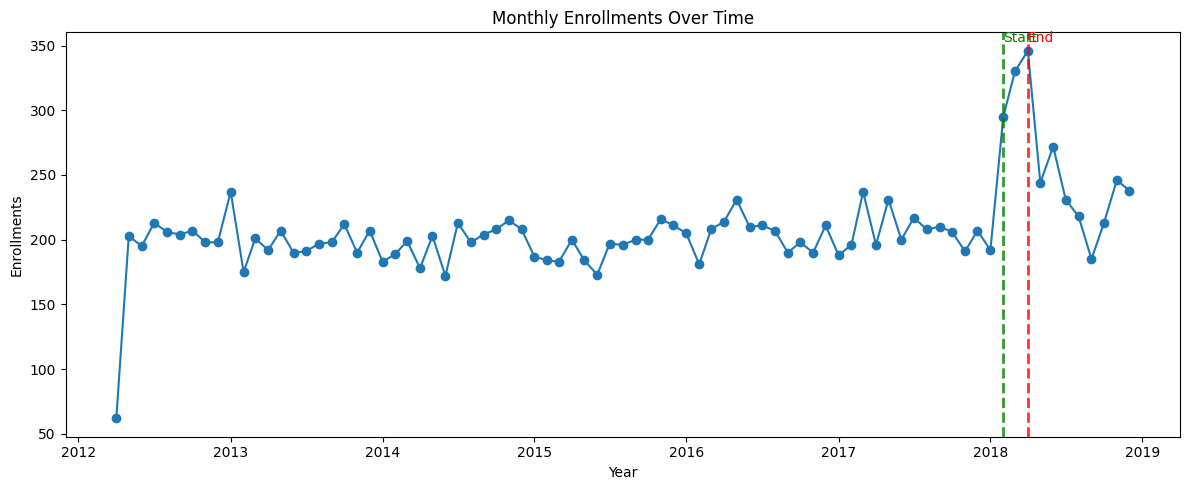

In [149]:

# Ensure dates are timestamps
Enrollment_timeline['Enroll_YearMonth'] = Enrollment_timeline['Enroll_YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(Enrollment_timeline['Enroll_YearMonth'], Enrollment_timeline['Enrollments'], marker='o')

plt.title("Monthly Enrollments Over Time")
plt.xlabel("Year")
plt.ylabel("Enrollments")

# --- X AXIS: SHOW ONLY YEARS ---
plt.gca().xaxis.set_major_locator(mdates.YearLocator())              # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))      # format = YYYY

plt.xticks(rotation=0)  # keep horizontal since there are few ticks

# --- ADD PROMOTION MARKERS ---
promo_start = pd.to_datetime('2018-02-01')
promo_end   = pd.to_datetime('2018-04-01')

# Vertical dashed lines
plt.axvline(promo_start, color='green', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(promo_end, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Position annotations slightly above max value
y_top = Enrollment_timeline['Enrollments'].max() * 1.02

plt.text(promo_start, y_top, 
         'Start', color='green', ha='left')

plt.text(promo_end, y_top,
         'End', color='red', ha='left')

plt.tight_layout()
plt.show()


###### We can see a skpie in enrollments in the promotion time period

### Effect of Promotion on Average Monthly Flights

In [150]:
promo_behavior = (
    Merged_df.groupby('Enrollment Type')['Total Flights']
    .mean()
    .reset_index(name='Avg_Monthly_Flights').round(2)
)

promo_behavior


,Enrollment Type,Avg_Monthly_Flights
0,2018 Promotion,4.20
1,Standard,1.22


###### Customers who enrolled during 2018 promotion flew 3.4 times more than other customers

### Effect of Promotion on Canellations

#### Promotion Vs. Standard Cancellation Rate

In [151]:
History_df_Clean['Cancelled'] = History_df_Clean['Cancellation Date'].notna()

Cancellation_Rate = (
    History_df_Clean.groupby('Enrollment Type')['Cancelled']
    .mean().mul(100).round(2)
    .reset_index(name='Cancellation Rate %')
)

Cancellation_Rate






,Enrollment Type,Cancellation Rate %
0,2018 Promotion,11.84
1,Standard,12.38


###### no significant difference between 2018 enrollments and others

#### Tenure of Enrollment

In [152]:
History_df_Clean['Tenure_Months'] = History_df_Clean['Tenure_Months'].astype('Int64')


History_df_Clean

KeyError: 'Tenure_Months'

In [ ]:
def tenure_by_category(category_col):
    """
    Compare customer tenure (in months) across any categorical variable.
    category_col: column name in History_df_Clean (string)
    """

    df = History_df_Clean.copy()

    # Ensure tenure exists in months
    df['Tenure_Months'] = np.ceil(
        (df['Cancellation Date'] - df['Enrollment Date']).dt.days / 30
    )

    # Create cancellation flag if missing
    if 'Cancelled' not in df.columns:
        df['Cancelled'] = df['Cancellation Date'].notna()

    result = (
        df.groupby(category_col)
        .agg(
            Customers=('Loyalty Number', 'count'),
            Cancelled=('Cancelled', 'sum'),
            Avg_Tenure_Months=('Tenure_Months', 'mean'),   # moved up
            Cancellation_Rate=('Cancelled', 'mean'),
            Median_Tenure_Months=('Tenure_Months', 'median'),
            Min_Tenure_Months=('Tenure_Months', 'min'),
            Max_Tenure_Months=('Tenure_Months', 'max')
        )
        .reset_index()
    )

    # Convert churn rate → percentage
    result['Cancellation_Rate'] = (result['Cancellation_Rate'] * 100).round(2)

    # Round all numeric values
    result = result.round(2)

    # Sort by Avg_Tenure_Months descending
    result = result.sort_values(by='Avg_Tenure_Months', ascending=False)

    return result


In [ ]:
tenure_by_category('Enrollment Type')

NameError: name 'tenure_by_category' is not defined

In [ ]:
def tenure_by_category_with_enrollment_type(category_col):
    """
    Compare customer tenure in months across any category,
    split by Enrollment Type (Standard vs 2018 Promotion).
    """

    df = History_df_Clean.copy()

    # Compute tenure in months (rounded up)
    df['Tenure_Months'] = np.ceil(
        (df['Cancellation Date'] - df['Enrollment Date']).dt.days / 30
    )

    # Cancellation flag
    if 'Cancelled' not in df.columns:
        df['Cancelled'] = df['Cancellation Date'].notna()

    # Group by category + enrollment type
    result = (
        df.groupby([category_col, 'Enrollment Type'])
        .agg(
            Customers=('Loyalty Number', 'count'),
            Cancelled=('Cancelled', 'sum'),
            Avg_Tenure_Months=('Tenure_Months', 'mean'),
            Cancellation_Rate=('Cancelled', 'mean'),
            Median_Tenure_Months=('Tenure_Months', 'median'),
            Min_Tenure_Months=('Tenure_Months', 'min'),
            Max_Tenure_Months=('Tenure_Months', 'max')
        )
        .reset_index()
    )

    # Convert churn rate to %
    result['Cancellation_Rate'] = (result['Cancellation_Rate'] * 100).round(2)

    # Round all numeric columns
    result = result.round(2)

    return result


In [ ]:
tenure_by_category_with_enrollment_type('Loyalty Card')


,Loyalty Card,Enrollment Type,Customers,Cancelled,Avg_Tenure_Months,Cancellation_Rate,Median_Tenure_Months,Min_Tenure_Months,Max_Tenure_Months
0,Aurora,2018 Promotion,208,29,8.59,13.94,9.0,2.0,10.0
1,Aurora,Standard,3221,420,16.51,13.04,9.0,0.0,66.0
2,Nova,2018 Promotion,330,38,8.63,11.52,9.0,2.0,10.0
3,Nova,Standard,5341,679,17.56,12.71,9.0,0.0,71.0
4,Star,2018 Promotion,433,48,8.42,11.09,9.0,1.0,10.0
5,Star,Standard,7204,853,17.61,11.84,9.0,0.0,72.0


### Multi-Year Timeline Flights Trend

#### Total Flights

In [ ]:
Monthly_Flights = (
    Activity_df_Clean.groupby('Date')['Total Flights']
    .sum()
    .reset_index(name='Total_Flights')
    .sort_values('Total_Flights',ascending = False).head(10)
)

Monthly_Flights


,Date,Total_Flights
18,2018-07-01,37936
17,2018-06-01,33840
19,2018-08-01,32808
23,2018-12-01,28857
16,2018-05-01,27345
6,2017-07-01,26312
5,2017-06-01,23504
7,2017-08-01,22976
20,2018-09-01,22034
11,2017-12-01,21871


#### Average Monthly Distance

In [ ]:
Monthly_Distance = (
    Activity_df_Clean.groupby('Date')['Distance']
    .mean().round(2)
    .reset_index(name='Avg_Distance')
    .sort_values('Avg_Distance',ascending = False).head(10)
)

Monthly_Distance

,Date,Avg_Distance
18,2018-07-01,3426.59
17,2018-06-01,3017.43
19,2018-08-01,2933.00
23,2018-12-01,2594.34
6,2017-07-01,2488.87
16,2018-05-01,2444.59
5,2017-06-01,2248.62
7,2017-08-01,2184.43
11,2017-12-01,2071.09
20,2018-09-01,1990.75


In [ ]:
Monthly_Acc_Points = (
    Activity_df_Clean.groupby('Date')['Points Accumulated']
    .mean().round(2)
    .reset_index(name='Avg_Accumulated_Points')
    .sort_values('Avg_Accumulated_Points',ascending = False).head(10)
)

Monthly_Acc_Points

,Date,Avg_Accumulated_Points
18,2018-07-01,3810.26
17,2018-06-01,3373.48
19,2018-08-01,3268.1
23,2018-12-01,2813.08
16,2018-05-01,2720.76
6,2017-07-01,2488.87
5,2017-06-01,2248.62
7,2017-08-01,2184.43
20,2018-09-01,2114.69
11,2017-12-01,2071.09


###### No Difference in trend using flights/distance/points

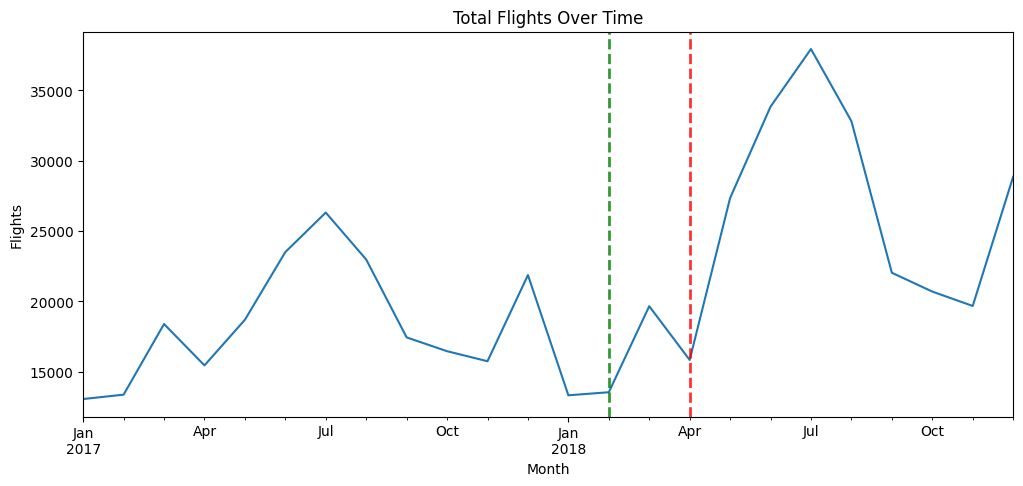

In [ ]:
monthly_flights = Activity_df_Clean.groupby('Date')['Total Flights'].sum()

monthly_flights.plot(figsize=(12,5))
# --- ADD PROMOTION MARKERS ---
promo_start = pd.to_datetime('2018-02-01')
promo_end   = pd.to_datetime('2018-04-01')

# Vertical dashed lines
plt.axvline(promo_start, color='green', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(promo_end, color='red', linestyle='--', linewidth=2, alpha=0.8)



plt.title("Total Flights Over Time")
plt.xlabel("Month")
plt.ylabel("Flights")

plt.show()

###### It is interesting to see that the spike starts after the promotion ended

### CLV Comparison Function

In [ ]:
def clv_driver_category(df, category_col):
    """
    Compares CLV across categories.
    df: your History_df_Clean
    category_col: string, column name to compare
    """
    table = (
        df.groupby(category_col)['CLV']
        .agg(['count', 'mean', 'median', 'min', 'max'])
        .round(2)
        .reset_index()
    )
    return table


In [ ]:
def clv_driver_category(category_col):
    """
    Compare CLV across categories in Merged_df.
    category_col: column name (string)
    """
    table = (
        Merged_df.groupby(category_col)['CLV']
        .agg(['count', 'mean', 'median', 'min', 'max'])
        .sort_values('mean',ascending = False)
        .round(2)
        .reset_index()
    )
    return table

In [ ]:
clv_driver_category('City')

,City,count,mean,median,min,max
0,Whistler,13591,8775.06,6685.07,2004.35,66025.75
1,Thunder Bay,5962,8507.87,5711.96,2114.74,43019.01
2,Kelowna,1917,8453.68,6005.21,2179.43,46611.87
3,Montreal,47622,8321.34,5979.72,1898.01,83325.38
4,Sudbury,5214,8297.85,5838.90,2178.52,61134.68
5,Victoria,8920,8212.78,6521.37,2132.77,44468.02
6,Hull,8267,8143.33,6005.85,2127.92,60556.19
7,Fredericton,9914,8126.33,5586.97,2141.98,73225.96
8,Winnipeg,15532,8056.19,5638.26,1898.01,83325.38
9,Regina,9504,8038.38,5639.94,2154.07,67907.27


###### No significant difference between promotion/standard

In [ ]:
def plot_clv_category(result_table, category_col):
    """
    Plots mean CLV for each category in result_table.
    result_table: output of clv_driver_category()
    category_col: the categorical column being compared
    """
    plt.figure(figsize=(10,5))
    plt.bar(result_table[category_col].astype(str), result_table['mean'], color='skyblue')

    # Add labels and styling
    plt.title(f"Mean CLV by {category_col}")
    plt.xlabel(category_col)
    plt.ylabel("Mean CLV")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Distance per Flight Ratio

In [ ]:
customer_summary = (
    Activity_df_Clean.groupby('Loyalty Number')
    .agg(
        Total_Flights=('Total Flights', 'sum'),
        Total_Distance=('Distance', 'sum')
    )
    .reset_index()
)


customer_summary['Avg_Distance_Per_Flight'] = (
    customer_summary['Total_Distance'] / customer_summary['Total_Flights']
)

customer_summary = customer_summary.merge(
    History_df_Clean[['Loyalty Number', 'Enrollment Type']],
    on='Loyalty Number',
    how='left'
)

distance_by_enrollment = (
    customer_summary.groupby('Enrollment Type')['Avg_Distance_Per_Flight']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .round(2)
    .reset_index()
)

distance_by_enrollment




,Enrollment Type,count,mean,median,min,max
0,2018 Promotion,924,1505.52,1510.37,637.43,2489.0
1,Standard,14243,1502.06,1499.48,511.00,2496.0
